<a href="https://colab.research.google.com/github/AI-Amponsah/Driver_Drowsiness-Detection-FinalYearProject/blob/main/SDDDs_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [7]:
tensorflow.config.list_physical_devices('GPU')

[]

In [9]:
labels = os.listdir("/content/drive/MyDrive/dataset_new/train")
labels

['Closed', 'Open', 'no_yawn', 'yawn']

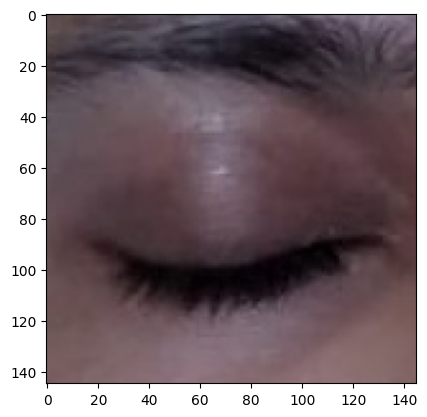

In [10]:
plt.imshow(plt.imread("/content/drive/MyDrive/dataset_new/train/Closed/_0.jpg"))

In [ ]:
a = plt.imread("/content/drive/MyDrive/dataset_new/train/yawn/1.jpg")


array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[154, 169, 192],
        [155, 170, 193],
        [154, 169, 192],
        ...,
        [213, 180, 161],
        [215, 182, 163],
        [217, 184, 165]],

       [[154, 169, 192],
        [154, 169, 192],
        [153, 168, 191],
        ...,
        [212, 179, 160],
        [213, 180, 161],
        [214, 181, 162]],

       [[153, 168, 191],
        [153, 168, 191],
        [152, 167, 190],
        ...,
        [213, 180, 161],
        [213, 180, 161],
        [213, 180, 161]]], dtype=uint8)
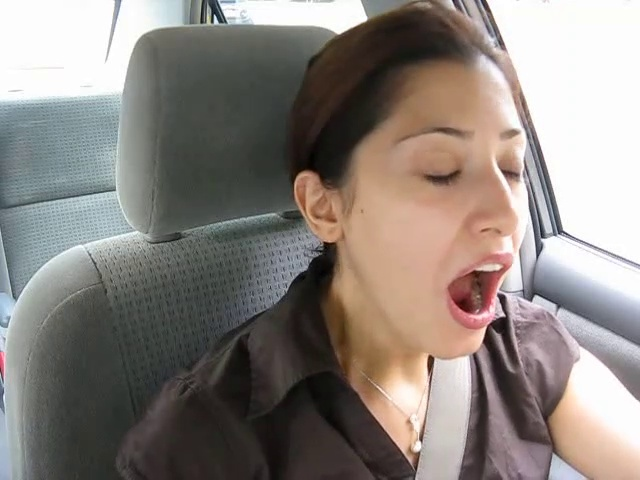

In [13]:
a

In [14]:
a.shape

(480, 640, 3)

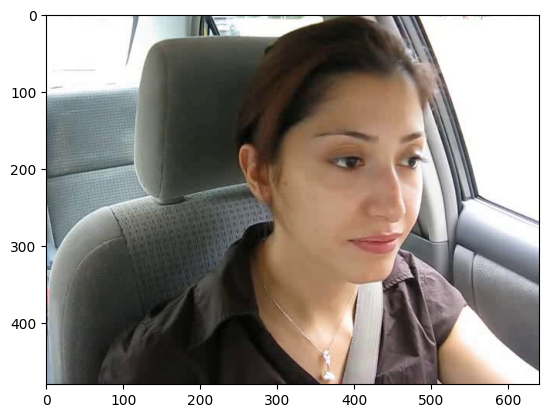

In [15]:
plt.imshow(plt.imread("/content/drive/MyDrive/dataset_new/train/no_yawn/1.jpg"))

In [22]:
trainDataGen = ImageDataGenerator(rescale=1./255, validation_split= 0.1)

In [23]:
trainData = trainDataGen.flow_from_directory("/content/drive/MyDrive/dataset_new/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2223 images belonging to 4 classes.


In [24]:
validationData = trainDataGen.flow_from_directory("/content/drive/MyDrive/dataset_new/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 244 images belonging to 4 classes.


In [25]:
testDataGen = ImageDataGenerator(rescale=1./255)

In [26]:
testData = testDataGen.flow_from_directory("/content/drive/MyDrive/dataset_new/test",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 433 images belonging to 4 classes.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
trainData

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
model.build(input_shape=(80, 80, 3))

In [ ]:
model.summary()

In [ ]:
validation_steps = len(testData)
validation_steps

In [ ]:
history = model.fit(trainData, epochs=50, validation_data = testData, shuffle=True, validation_steps = len(testData))

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

In [ ]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
model.save("SDDDs_CNN.h5")